## 빅데이터 실습

### 타이타닉 생존자 상관분석
#### 상관계수로 두 변수간의 상관관계 유추
- correlation coefficient
#### 상관계수 값(-1 ~ 0 ~ 1)
- 음수면 서로관의 음의 상관관계(한쪽값이 올라가면, 다른값은 떨어짐)
- 양수면 서로관의 양의 상관관계(한쪽값이 올라가면, 다른값도 올라감)
- 0.0 ~ 0.2 : 상관관계가 거의 없다.
- 0.2 ~ 0.4 : 약간 상관관계가 있다.
- 0.4 ~ 0.6 : 상관관계가 있다.
- 0.6 ~ 0.8 : 강한 상관관계가 있다.
- 0.8 ~ 1.0 : 서로간 매우 긴밀한 연관이 있다. 상관관계 최고

> 1. 데이터 수집 : Seaborn 테스트 데이터

In [1]:
# 필수 라이브러리 등록
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [3]:
# seaborn 타이타닉 데이터
dfTitanic = sns.load_dataset('titanic')
dfTitanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### 타이타닉 생존자 데이터 문제
- 결측치가 많다면 결측치를 제거

In [4]:
# 결측치 확인
dfTitanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 결측치 발견
- age(177), embarked(2), deck(688), embark_town(2) 개 발견
#### 결측치를 채워넣는 방법
- `DataFrame.describe()` 로 구해지는 기술통계값(count,sum,...)으로 채워넣는게 가장 일반적이다.
> 1. 평균값
> 2. 중앙값
> 3. 최소값(min), 최대값(max)
> 4. 최빈값(데이터 개수가 가장 많은 것)
> 5. 최소 빈도값

In [5]:
dfTitanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 조사결과는 20대 중후반이 가장 많다.
ageMedian = dfTitanic['age'].median()

In [7]:
# age 결측치 입력
dfTitanic['age'] = dfTitanic['age'].fillna(ageMedian)

In [8]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# 조사결과 대부분 S(Southampton)에서 배를 탔다.즉, 결측치2개는 S를 넣어주면 된다.
dfTitanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# embarked 결측치 입력
dfTitanic['embarked'] = dfTitanic['embarked'].fillna('S')

In [11]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
dfTitanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [13]:
# embark_town 도 똑같이 해준다.
dfTitanic['embark_town'] = dfTitanic['embark_town'].fillna('Southampton')

In [14]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
# deck 조사 
dfTitanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

> 데크가 제일 많은 빈도로 나온 'C' deck 선택
> 각 데크별로 빈도의 차이가 별로 없기 때문에 가장 많은 'C' deck 선택

In [16]:
# deck 결측치 제거
dfTitanic['deck'] = dfTitanic['deck'].fillna('C')

In [17]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
# 전처리 완료(결측치 제거)
dfTitanic.to_excel('./data/타이타닉생존차_전처리완료.xlsx', index=False)

#### 시각화

In [19]:
# 한글 깨짐 해결
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

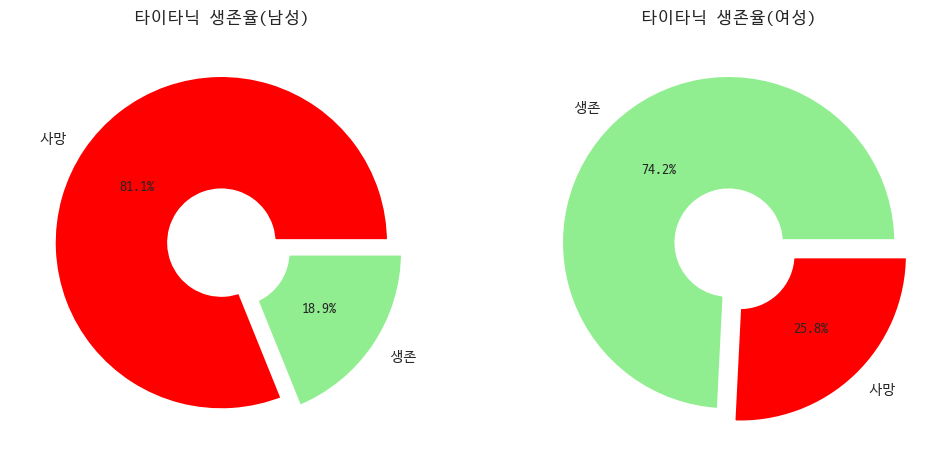

In [20]:
# 파이차트
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pandas의 DataFrame 이나 Series 는 matplotlib 차트로 그릴 수 있다.
maleLabels = ['사망', '생존']
femaleLabels = ['생존', '사망']

maleColor = ['red', 'lightGreen']
femaleColor = ['lightGreen', 'red']

wedgeProps = {
    "width": 0.7,
    "edgecolor": "w",
    "linewidth": 5
}

dfTitanic['survived'][dfTitanic['sex'] == 'male'].value_counts().plot.pie(ax=ax[0], shadow=False, explode=[0, 0.1],
                                                                          autopct='%1.1f%%', labels=maleLabels,
                                                                          colors=maleColor, wedgeprops=wedgeProps)
dfTitanic['survived'][dfTitanic['sex'] == 'female'].value_counts().plot.pie(ax=ax[1], shadow=False, explode=[0, 0.1],
                                                                            autopct='%1.1f%%', labels=femaleLabels,
                                                                            colors=femaleColor, wedgeprops=wedgeProps)

ax[0].set_title('타이타닉 생존율(남성)')
ax[1].set_title('타이타닉 생존율(여성)')

ax[0].set_axis_off()  # 축의 count 라벨 제거
ax[1].set_axis_off()  # 축의 count 라벨 제거
plt.show()

#### 등급(pclass)별 생존자 수를 Bar 차트로 시각화

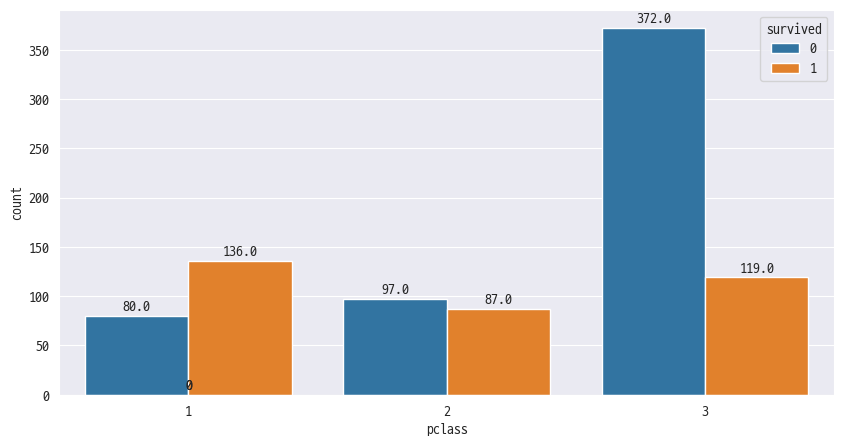

In [21]:
plt.figure(figsize=(10, 5))

# stat = count, percent 등이 있다.
ax = sns.countplot(dfTitanic, x='pclass', hue='survived', stat='count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, height, ha='center', size=10)

plt.show()

#### 데이터 속성(변수)간 상관관계
- pandas 의 DataFrame에 corr() 함수 사용

In [22]:
# 상관계수는 object, categor에는 적용이 불가능하다!
# 상관계수 method : peason, kendall, spearman
dfTitanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']].corr(method='pearson')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


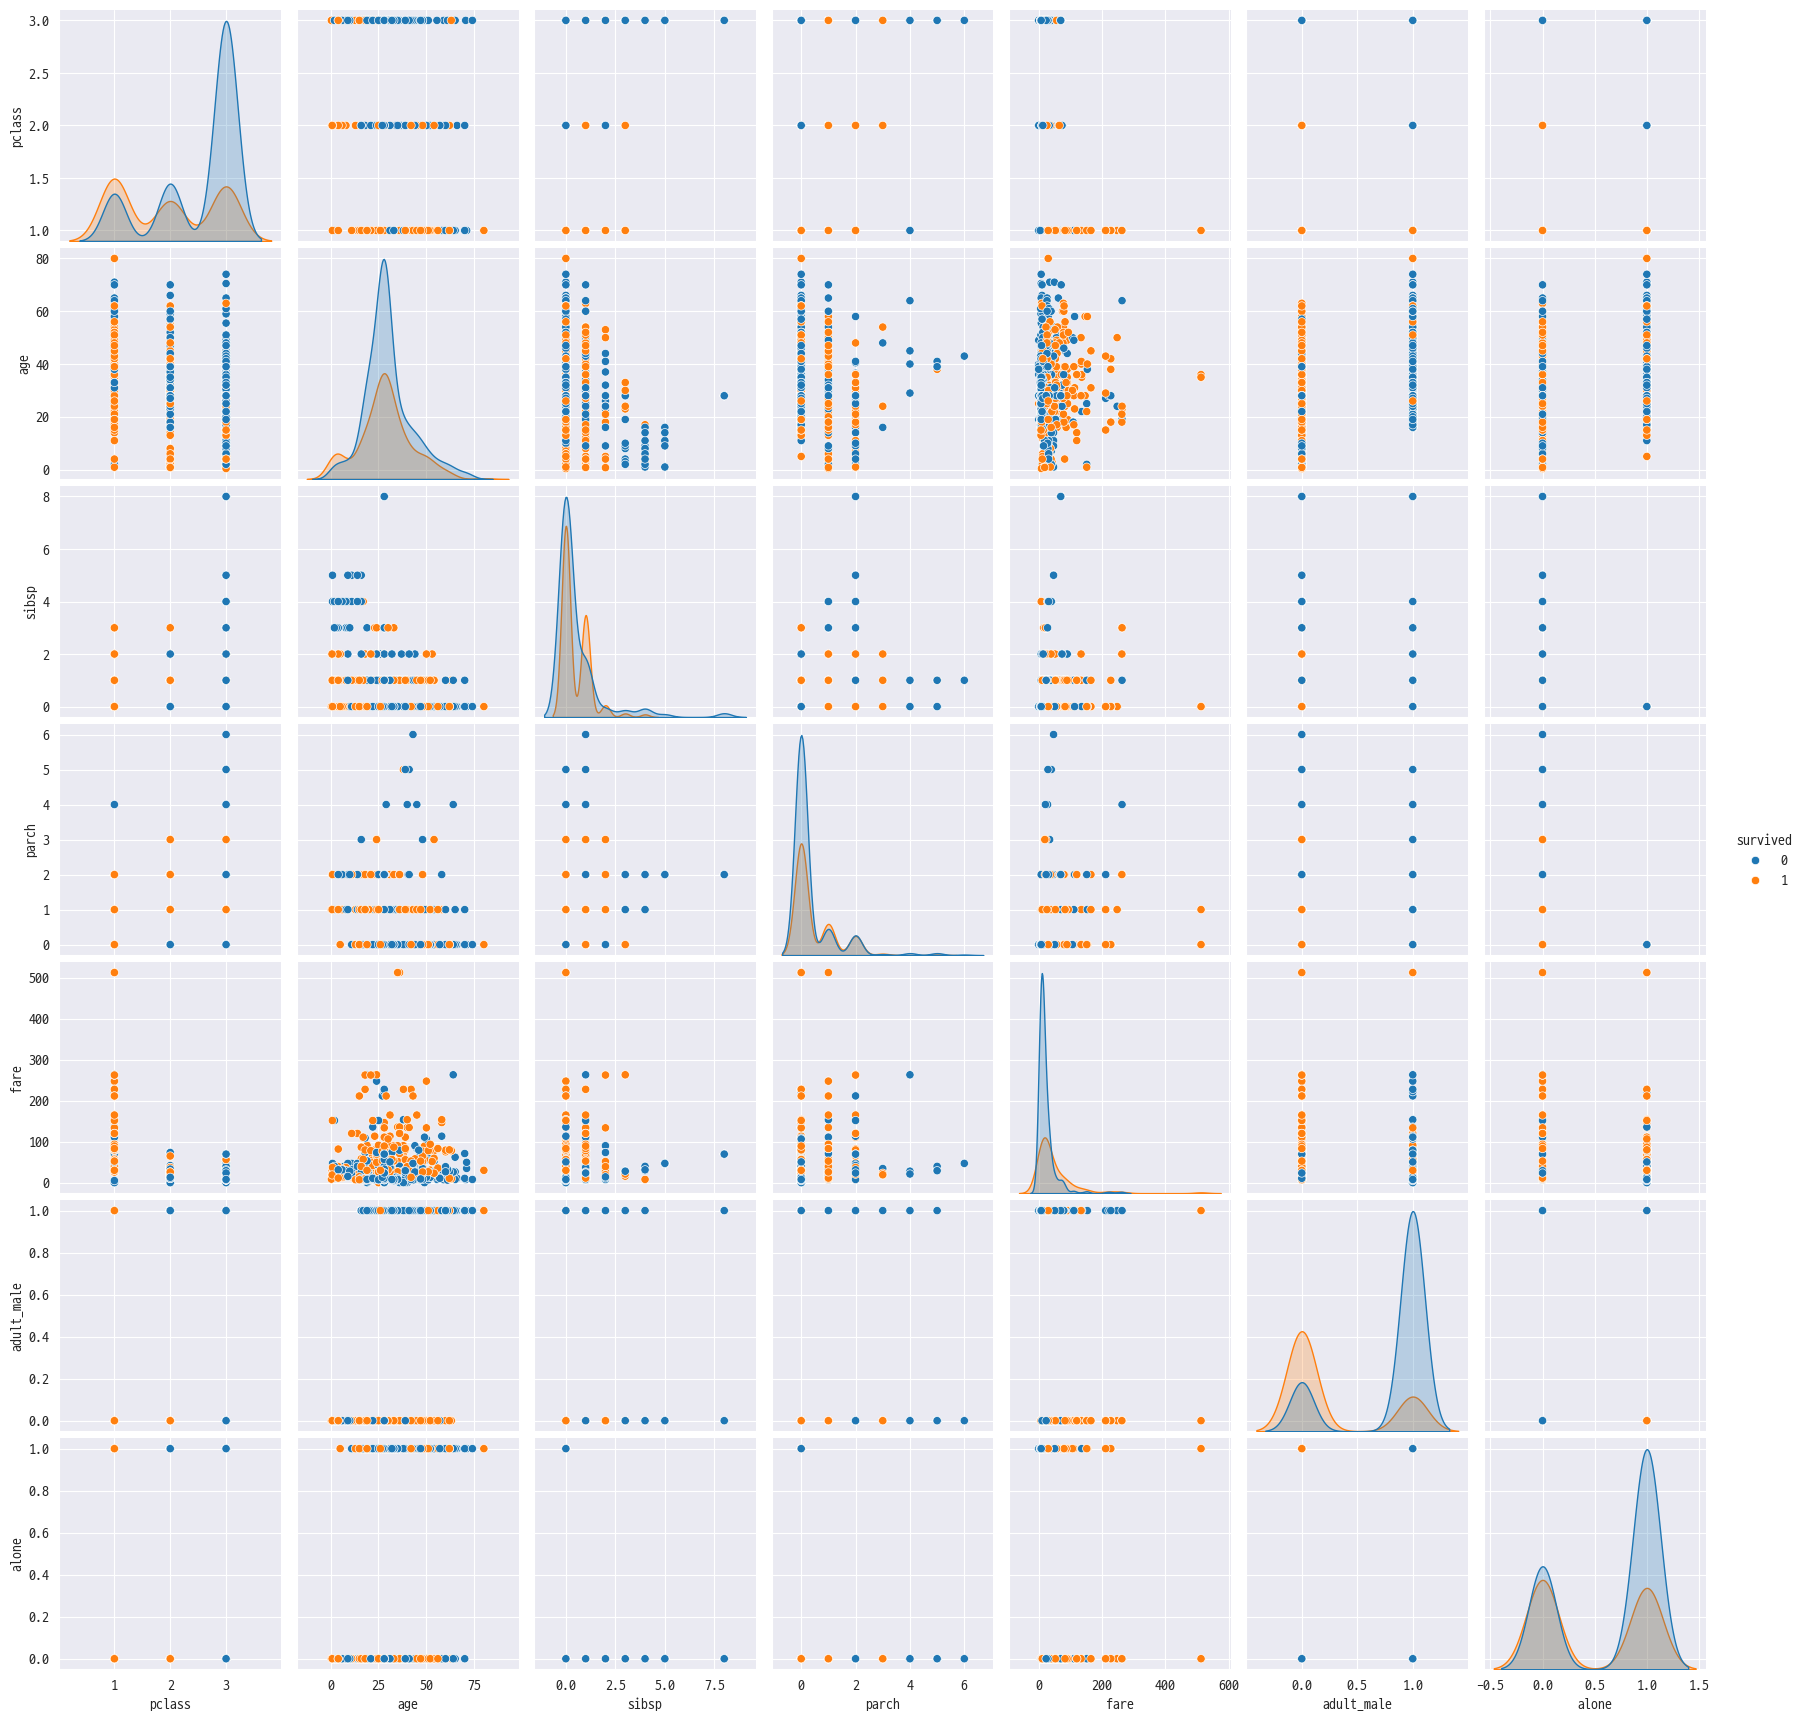

In [23]:
sns.pairplot(dfTitanic, hue='survived')
plt.show()

In [24]:
# 상관관계를 히트맵 시각화
def categoryAge(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 70:
        return 7
    else:
        return 8

In [25]:
dfTitanic['age2'] = dfTitanic['age'].apply(categoryAge)
dfTitanic['sex'] = dfTitanic['sex'].map({"male": 1, "female": 0})  # 여러번 수행하면 안됨
dfTitanic['family'] = dfTitanic['sibsp'] + dfTitanic['parch'] + 1

In [26]:
dfTitanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
886,0,2,1,27.0,0,0,13.00,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,2,1
890,0,3,1,32.0,0,0,7.75,Q,Third,man,True,C,Queenstown,no,True,3,1


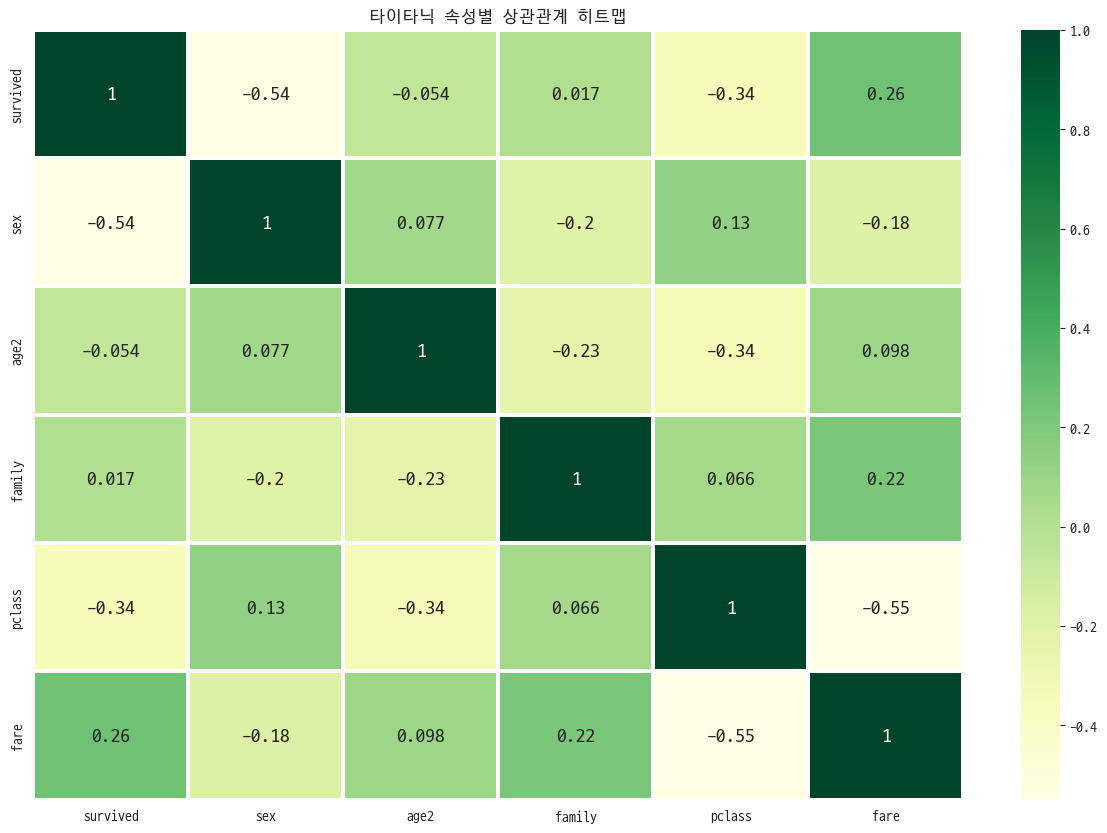

In [27]:
# 히트맵으로 시각화
plt.figure(figsize=(15, 10))
hData = dfTitanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

# 히트맵 속성 정리
## square : True(정사각형), False(정사각형X)
## annot : True(실제 데이터값 표시), False(표시X)
sns.heatmap(hData.astype(float).corr(), linewidths=1.5, square=False, vmax=1.0, cmap='YlGn', annot=True,
            annot_kws={'size': 14})

plt.title('타이타닉 속성별 상관관계 히트맵')
plt.show()

#### 결과
- 상관관계는 음의관계, 양의관계 모두 중요.
- 절대값 0.4 ~ 1.0 사이의 값에 대한 속성간의 분석을 시작하면 된다.
- 0.2 이하는 분석에서 제외